## **DataFrames**

In [85]:
import pandas as pd
import numpy as np

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.

data can be many different things:
* Dict of 1D ndarrays, lists, dicts, or Series
* 2-D numpy.ndarray
* Structured or record ndarray
* A Series
* Another DataFrame

## From dict of Series or dicts

In [86]:
d = {'one' : pd.Series([1., 2., 3., 5.], index=['a', 'b', 'c', 'e']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
d

{'one': a    1.0
 b    2.0
 c    3.0
 e    5.0
 dtype: float64, 'two': a    1.0
 b    2.0
 c    3.0
 d    4.0
 dtype: float64}

In [87]:
d['two']

a    1.0
b    2.0
c    3.0
d    4.0
dtype: float64

In [88]:
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0
e,5.0,NaN


In [89]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [90]:
pd.DataFrame(d['one'], index=['d', 'b', 'a'])

,0
d,NaN
b,2.0
a,1.0


In [91]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [92]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'one', 'three'])

,two,one,three
d,4.0,NaN,NaN
b,2.0,2.0,NaN
a,1.0,1.0,NaN


In [93]:
df.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [94]:
df.columns

Index(['one', 'two'], dtype='object')

## From dict of ndarrays / lists

In [95]:
d = {'one' : [1., 2., 3., 4.],
     'two' : [4., 3., 2., 1.]}
d

{'one': [1.0, 2.0, 3.0, 4.0], 'two': [4.0, 3.0, 2.0, 1.0]}

In [96]:
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [97]:
df = pd.DataFrame(d, index=['a', 'b', 'c', 'd'])
df

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [98]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

## From structured or record array

In [99]:
data = np.zeros((2,), dtype=[('A', 'i4'),('B', 'f4'),('C', 'a10')])
data

array([(0, 0., b''), (0, 0., b'')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [100]:
pd.DataFrame(data)

,A,B,C
0,0,0.0,b''
1,0,0.0,b''


In [101]:
data[:] = [(1,2.,'Hello'), (2,3.,"World")]

In [102]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [103]:
pd.DataFrame(data, index=['first', 'second'])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [104]:
pd.DataFrame(data, columns=['C', 'A', 'B'])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


In [105]:
pd.DataFrame(data, columns=['C', 'A', 'B'], index=['first','second'])

,C,A,B
first,b'Hello',1,2.0
second,b'World',2,3.0


In [106]:
pd.DataFrame(data, columns=['C', 'A', 'B'], index=['second','first'])

,C,A,B
second,b'Hello',1,2.0
first,b'World',2,3.0


## From a list of dicts

In [107]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [108]:
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [109]:
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [110]:
pd.DataFrame(data2, columns=['a', 'b'])

,a,b
0,1,2
1,5,10


## From a dict of tuples

In [111]:
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
   ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
   ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
   ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
   ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

## DataFrame.from_dict

In [112]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [113]:
foo_df = pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]))
foo_df.set_index(['A','B'])

,
A,B
1,4
2,5
3,6


In [114]:
bar_df = pd.DataFrame(foo_df)
bar_df

,A,B
0,1,4
1,2,5
2,3,6


**_If you pass orient='index', the keys will be the row labels_**

In [115]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]),
                       orient='index', columns=['one', 'two','three'])

,one,two,three
A,1,2,3
B,4,5,6


# Column selection, addition, deletion

In [116]:
series_dict = {'one' : pd.Series([1., 2., 3., 5.], index=['a', 'b', 'c', 'e']),
               'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(series_dict)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0
e,5.0,NaN


In [117]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
e    5.0
Name: one, dtype: float64

## Column addition

In [118]:
df['three'] = df['one'] * df['two']
df

,one,two,three
a,1.0,1.0,1.0
b,2.0,2.0,4.0
c,3.0,3.0,9.0
d,NaN,4.0,NaN
e,5.0,NaN,NaN


In [119]:
df['flag'] = df['one'] > 2
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False
e,5.0,NaN,NaN,True


## Column deletion

In [120]:
del df['two']
df

,one,three,flag
a,1.0,1.0,False
b,2.0,4.0,False
c,3.0,9.0,True
d,NaN,NaN,False
e,5.0,NaN,True


In [121]:
three = df.pop('three')
three

a    1.0
b    4.0
c    9.0
d    NaN
e    NaN
Name: three, dtype: float64

In [122]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False
e,5.0,True


## Columns insertion

In [123]:
df['foo'] = 'bar'
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar
e,5.0,True,bar


In [124]:
df["one"][4:]

e    5.0
Name: one, dtype: float64

In [125]:
df['one_trunc'] = df["one"][4:]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,NaN
b,2.0,False,bar,NaN
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN
e,5.0,True,bar,5.0


In [126]:
df.insert(4, 'one_clone', df['one'])

In [127]:
df

,one,flag,foo,one_trunc,one_clone
a,1.0,False,bar,NaN,1.0
b,2.0,False,bar,NaN,2.0
c,3.0,True,bar,NaN,3.0
d,NaN,False,bar,NaN,NaN
e,5.0,True,bar,5.0,5.0


# Assigning New Columns in Method Chains

In [128]:
iris = pd.read_csv('data/iris.data')
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**_assign always returns a copy of the data, leaving the original DataFrame untouched_**

In [129]:
iris.assign(sepal_ratio = iris['SepalWidth'] / iris['SepalLength'])

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [130]:
iris.assign(sepal_ratio_lambda = lambda x: (x['SepalWidth'] /  x['SepalLength'])).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio_lambda
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [131]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [132]:
iris = iris.assign(SepalRatio = lambda x: x.SepalWidth / x.SepalLength)
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,SepalRatio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [133]:
iris = iris.assign(PetalRatio = lambda x: x.PetalWidth / x.PetalLength)
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,SepalRatio,PetalRatio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275,0.142857
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245,0.142857
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851,0.153846
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913,0.133333
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000,0.142857


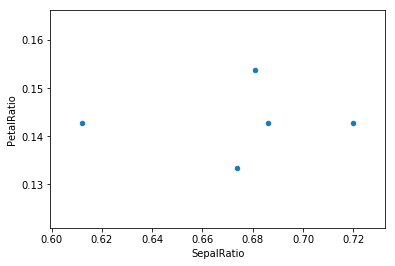

In [134]:
iris.query('SepalLength > 1').plot(kind='scatter', x='SepalRatio', y='PetalRatio')

# Indexing / Selection

In [135]:
series_dict = {'one' : pd.Series([1., 2., 3., 5.], index=['a', 'b', 'c', 'e']),
               'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd']),
               'three' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
sdf = pd.DataFrame(series_dict)
sdf

,one,two,three
a,1.0,1.0,1.0
b,2.0,2.0,2.0
c,3.0,3.0,3.0
d,NaN,4.0,4.0
e,5.0,NaN,NaN


## **Select index**

In [136]:
sdf.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

## **Select column**

In [137]:
sdf.one

a    1.0
b    2.0
c    3.0
d    NaN
e    5.0
Name: one, dtype: float64

In [138]:
sdf['one']

a    1.0
b    2.0
c    3.0
d    NaN
e    5.0
Name: one, dtype: float64

In [139]:
sdf[['one','two']]

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0
e,5.0,NaN


## **Select by condition**

In [140]:
sdf[sdf['one'] >= 3 ]

,one,two,three
c,3.0,3.0,3.0
e,5.0,NaN,NaN


## **Select row by label**

In [141]:
sdf.loc['a']

one      1.0
two      1.0
three    1.0
Name: a, dtype: float64

## **Select row by integer location**

In [142]:
sdf.iloc[0]

one      1.0
two      1.0
three    1.0
Name: a, dtype: float64

## **Select row and columns**

In [143]:
sdf.loc[['a','b'],['one','three']]

,one,three
a,1.0,1.0
b,2.0,2.0


## **Slice rows**

In [144]:
sdf[0:4]

,one,two,three
a,1.0,1.0,1.0
b,2.0,2.0,2.0
c,3.0,3.0,3.0
d,NaN,4.0,4.0


## **Select rows by boolean vector**

In [145]:
sdf[1:]

,one,two,three
b,2.0,2.0,2.0
c,3.0,3.0,3.0
d,NaN,4.0,4.0
e,5.0,NaN,NaN


In [146]:
sdf[:1]

,one,two,three
a,1.0,1.0,1.0


## Data alignment and arithmetic

In [147]:
np.random.randn(10, 4)

array([[ 0.31870699, -0.38701649, -0.70917518, -0.84753766],
       [ 0.81470037, -0.08648918, -0.82714806, -2.40473392],
       [ 0.53265707, -1.4949309 , -0.14947535,  0.76932603],
       [-1.44968579,  1.06019864,  0.55828103, -0.08739478],
       [-0.11920648,  0.25330013, -0.32665088,  0.39272632],
       [-0.17975769,  0.75482022,  0.536397  , -1.20074131],
       [-0.28768906, -1.0045117 , -0.16951049, -0.71921159],
       [-0.50553793,  1.3487948 ,  0.55867168, -0.43297702],
       [-0.92044954, -0.37814864,  0.21693999,  0.2719906 ],
       [ 1.64675723, -0.45494762, -0.74305091,  0.20705409]])

In [148]:
df1 = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
df1 

,A,B,C,D
0,0.979881,-1.392600,0.033348,0.644655
1,0.021890,0.540736,-0.171653,0.579105
2,-1.135993,1.064327,0.304349,2.034930
3,0.533211,0.727893,0.881487,-0.242585
4,0.015117,-0.368006,0.298041,1.413315
5,0.371037,-0.960541,0.131755,0.656136
6,2.135838,-1.184728,-0.119375,-0.136044
7,0.522714,0.446457,-1.913582,0.367613
8,0.793009,1.448466,-0.748145,-0.949419
9,1.763891,-1.526985,-0.626926,-0.133598


In [149]:
df2 = pd.DataFrame(np.random.randn(7, 3), columns=['A', 'B', 'C'])
df3 = df1 + df2
df3

,A,B,C,D
0,1.119899,-0.472036,0.567908,NaN
1,0.454584,-2.005779,1.754131,NaN
2,0.959836,1.498164,1.854500,NaN
3,0.399586,-0.064652,2.739296,NaN
4,-0.358646,0.096491,0.551627,NaN
5,-0.870354,-1.525048,0.172264,NaN
6,4.672964,0.391063,0.284861,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [150]:
df1.iloc[0]

A    0.979881
B   -1.392600
C    0.033348
D    0.644655
Name: 0, dtype: float64

In [151]:
df3 - df1.iloc[0]

,A,B,C,D
0,0.140018,0.920564,0.534560,NaN
1,-0.525297,-0.613179,1.720783,NaN
2,-0.020044,2.890764,1.821152,NaN
3,-0.580295,1.327949,2.705948,NaN
4,-1.338527,1.489091,0.518279,NaN
5,-1.850235,-0.132447,0.138916,NaN
6,3.693084,1.783663,0.251513,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [152]:
df4 = df3.get(list('ABC'))
df4 = df4[:7]
df4 = df4.abs()
df4

,A,B,C
0,1.119899,0.472036,0.567908
1,0.454584,2.005779,1.754131
2,0.959836,1.498164,1.854500
3,0.399586,0.064652,2.739296
4,0.358646,0.096491,0.551627
5,0.870354,1.525048,0.172264
6,4.672964,0.391063,0.284861


In [153]:
df4 * 5 + 2

,A,B,C
0,7.599494,4.360182,4.839540
1,4.272918,12.028894,10.770655
2,6.799181,9.490818,11.272501
3,3.997929,2.323258,15.696478
4,3.793230,2.482454,4.758137
5,6.351772,9.625238,2.861318
6,25.364822,3.955314,3.424304


## **Boolean operators**

In [154]:
df6 = pd.DataFrame({'a' : [1, 0, 1], 'b' : [0, 1, 1] }, dtype=bool)
df7 = pd.DataFrame({'a' : [0, 1, 1], 'b' : [1, 1, 0] }, dtype=bool)

In [155]:
df6 & df7

,a,b
0,False,False
1,False,True
2,True,False


In [156]:
df6 | df7

,a,b
0,True,True
1,True,True
2,True,True


# **Transposition or Pivot**

In [157]:
df4

,A,B,C
0,1.119899,0.472036,0.567908
1,0.454584,2.005779,1.754131
2,0.959836,1.498164,1.854500
3,0.399586,0.064652,2.739296
4,0.358646,0.096491,0.551627
5,0.870354,1.525048,0.172264
6,4.672964,0.391063,0.284861


In [158]:
df4.T

,0,1,2,3,4,5,6
A,1.119899,0.454584,0.959836,0.399586,0.358646,0.870354,4.672964
B,0.472036,2.005779,1.498164,0.064652,0.096491,1.525048,0.391063
C,0.567908,1.754131,1.854500,2.739296,0.551627,0.172264,0.284861


# **NumPy functions**

In [159]:
np.exp(df4.T)

,0,1,2,3,4,5,6
A,3.064544,1.575517,2.611269,1.491207,1.431390,2.387757,107.014498
B,1.603256,7.431879,4.473467,1.066787,1.101299,4.595362,1.478551
C,1.764572,5.778424,6.388505,15.476081,1.736076,1.187991,1.329577


In [160]:
np.asarray(df4.T)

array([[1.11989887, 0.45458361, 0.95983617, 0.39958578, 0.35864598,
        0.87035443, 4.67296432],
       [0.47203636, 2.00577879, 1.49816362, 0.06465151, 0.0964908 ,
        1.52504763, 0.39106287],
       [0.56790807, 1.75413098, 1.85450022, 2.73929567, 0.55162742,
        0.17226368, 0.2848608 ]])

# CONSOLE print

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, a to e
Data columns (total 5 columns):
one          4 non-null float64
flag         5 non-null bool
foo          5 non-null object
one_trunc    1 non-null float64
one_clone    4 non-null float64
dtypes: bool(1), float64(3), object(1)
memory usage: 365.0+ bytes


In [162]:
print(df)

   one   flag  foo  one_trunc  one_clone
a  1.0  False  bar        NaN        1.0
b  2.0  False  bar        NaN        2.0
c  3.0   True  bar        NaN        3.0
d  NaN  False  bar        NaN        NaN
e  5.0   True  bar        5.0        5.0


In [163]:
df = pd.DataFrame(np.random.randn(4, 3),index=["first","second","third","fourth"], columns=['A', 'B', 'C'])
df

,A,B,C
first,-1.661203,0.794256,-0.659899
second,-1.113524,1.159992,-0.242765
third,0.364682,0.964560,1.306812
fourth,-1.000014,0.118459,0.847570


In [164]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

In [165]:
df.columns = [x.lower() for x in df.columns]

In [166]:
df.columns

Index(['a', 'b', 'c'], dtype='object')

In [167]:
df.values

array([[-1.66120337,  0.79425592, -0.65989938],
       [-1.11352421,  1.15999163, -0.2427649 ],
       [ 0.36468205,  0.96456039,  1.30681166],
       [-1.00001382,  0.11845854,  0.84756989]])